## Imports

In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## PCA and KPCA

In [3]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
    
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        cov = np.cov(X.T)

        eigenvalues, eigenvectors = np.linalg.eig(cov)

        eigval_order = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[:, eigval_order]

        self.components = eigenvectors[:, :self.n_components]

        return self
    
    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components)
    
    def inverse_transform(self, X):
        return np.dot(X, self.components.T) + self.mean

class KPCA:
    def __init__(self, n_components, gamma):
        self.n_components = n_components
        self.kernel = self.rbf
        self.gamma = gamma

    def rbf(self, x1, x2):
        return np.exp(-self.gamma * np.linalg.norm(x1 - x2, axis=0)**2)


    def fit(self, X):
        self.X = X
        self.n_samples = X.shape[0]

        row = X.T.reshape(X.shape[1], -1, 1)
        col = X.T.reshape(X.shape[1], 1, -1) 
        
        self.K = self.kernel(row, col)
        
        one_n = np.ones((self.n_samples, self.n_samples)) / self.n_samples
        self.K_prime = self.K - one_n@self.K - self.K@one_n + one_n@self.K@one_n
        
        eigenvalues, eigenvectors = np.linalg.eigh(self.K_prime)
        eigval_order = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[:, eigval_order]

        self.alphas = eigenvectors[:, :self.n_components]
        self.lambdas = eigenvalues[eigval_order][:self.n_components]

        return self
    
    def transform(self, X):
        self.fit(X)
        return self.alphas

## Loading Concentric Circle Data

         f1        f2  labels
0 -0.805303  0.532122       0
1  0.075279  0.143247       1
2  0.099070  0.102824       1
3 -0.126898 -0.940428       0
4  0.163575 -0.190462       1


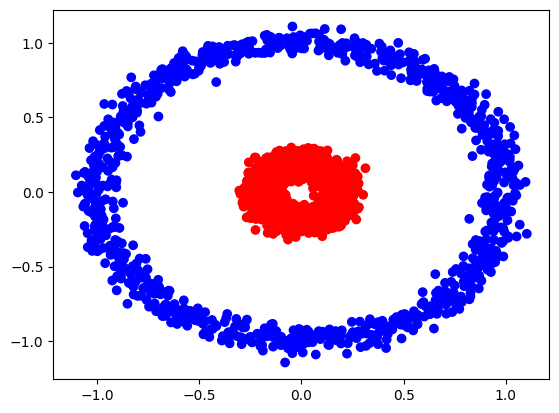

In [4]:
data = pd.read_csv('data/circles.csv', index_col=0)
x = data[['f1', 'f2']].values
colors = ['r' if label == 1 else 'b' for label in data['labels']]
print(data.head())


plt.scatter(x[:, 0], x[:, 1], c=colors)
plt.show()


## PCA

[[ 0.79151135  0.61115447]
 [-0.61115447  0.79151135]]


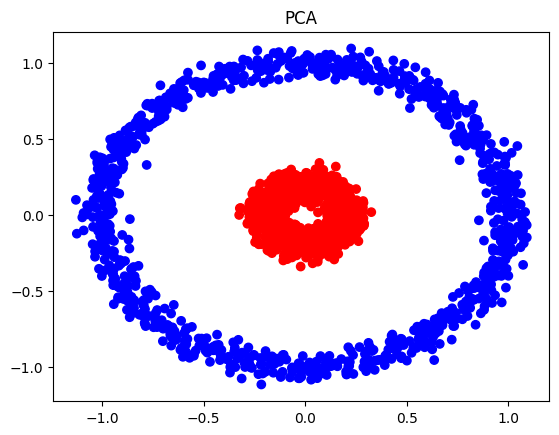

In [5]:
pca = PCA(n_components=2)

pca = pca.fit(x)

transformed = pca.transform(x)

print(pca.components)

plt.scatter(transformed[:, 0].flatten(), transformed[:, 1].flatten(), marker='o', c = colors)
plt.title('PCA')
plt.show()

## KPCA

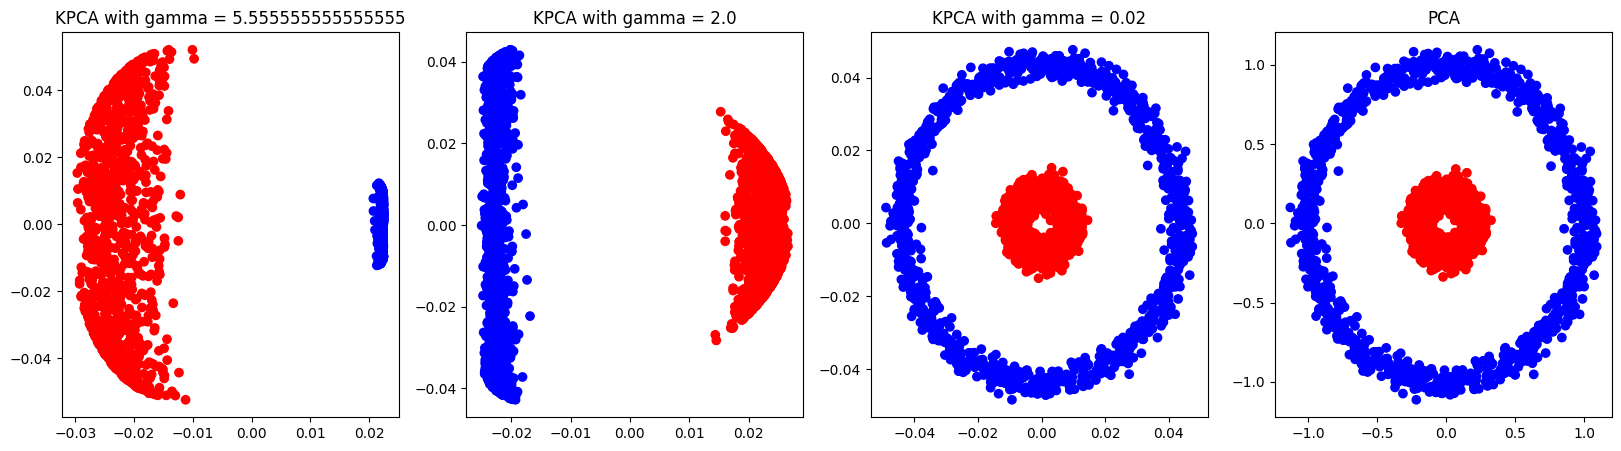

In [6]:
sigmas = np.array([.3, .5, 5])

gammas = 1 / (2 * sigmas ** 2)

fig, axs = plt.subplots(1, 4, figsize=(20, 5))



for i, gamma in enumerate(gammas):

    kpca = KPCA(n_components=2, gamma=gamma)

    kpca = kpca.fit(x)

    transformed_k = kpca.alphas

    axs[i].scatter(transformed_k[:, 0].flatten(), transformed_k[:, 1].flatten(), marker='o', c = colors)
    axs[i].set_title(f'KPCA with gamma = {gamma}')


axs[3].scatter(transformed[:, 0].flatten(), transformed[:, 1].flatten(), marker='o', c = colors)
axs[3].set_title('PCA')
plt.show()

# Loading Swiss Roll Data

,f1,f2,f3,labels
0,6.225954,16.676370,-9.446426,11.599773
1,5.773090,11.816198,3.367431,6.806279
2,6.461704,14.759841,1.866690,6.599547
3,5.866052,7.344302,-2.511765,5.914923
4,2.066957,6.436675,-10.899148,11.180135


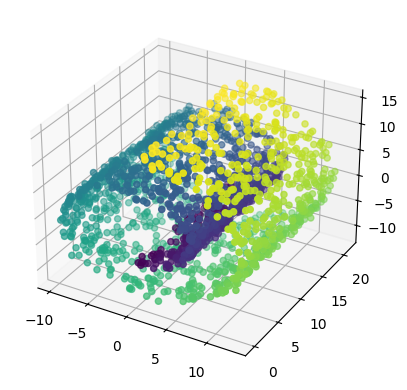

In [7]:
swiss_df = pd.read_csv('data/swr.csv', index_col=0)
x = swiss_df[['f1', 'f2', 'f3']].values
colors = swiss_df['labels']

display(swiss_df.head())

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:, 0].flatten(), x[:, 1].flatten(), x[:,2].flatten(), marker='o', c = colors)
plt.show()

## PCA

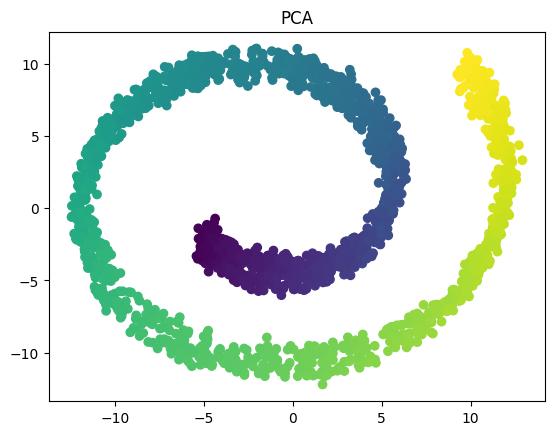

In [8]:
pca = PCA(n_components=2)

pca = pca.fit(x)

transformed = pca.transform(x)


plt.scatter(transformed[:, 0].flatten(), transformed[:, 1].flatten(), marker='o', c = colors)
plt.title('PCA')
plt.show()

# KPCA

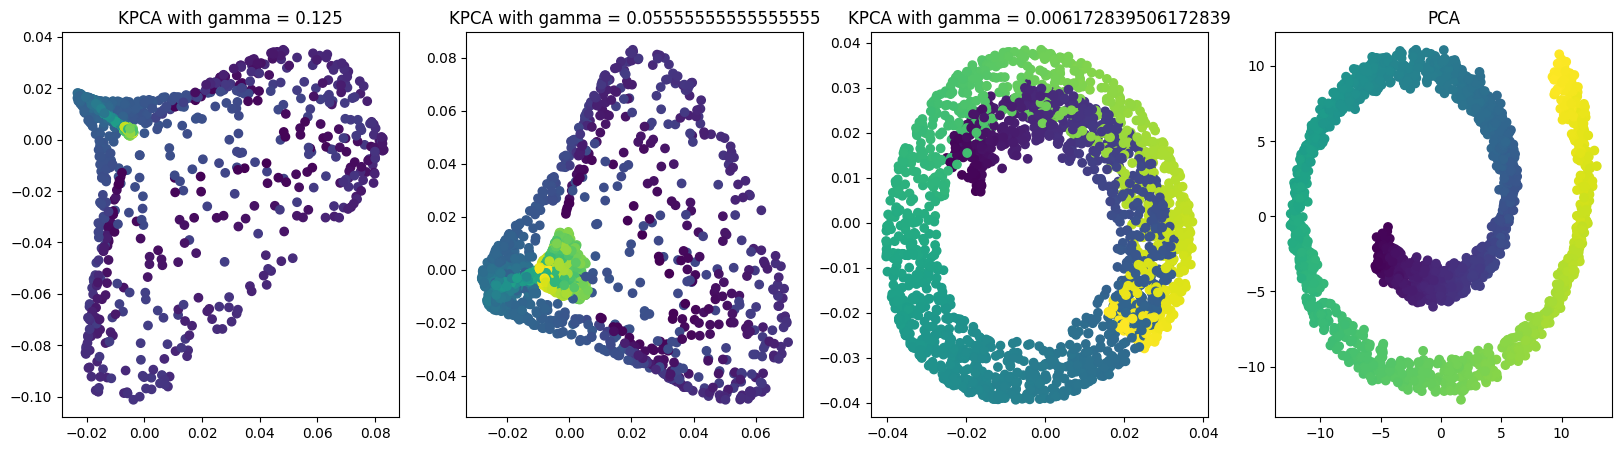

In [9]:
sigmas = np.array([2, 3, 9])
gammas = 1 / (2 * sigmas ** 2)

fig, axs = plt.subplots(1, 4, figsize=(20, 5))


for i, gamma in enumerate(gammas):

    def rbf(x1, x2):
        return np.exp(-gamma * np.linalg.norm(x1 - x2, axis=0) ** 2)

    kpca = KPCA(n_components=2, gamma=gamma)

    kpca = kpca.fit(x)

    transformed_k = kpca.alphas

    axs[i].scatter(transformed_k[:, 0].flatten(), transformed_k[:, 1].flatten(), marker='o', c = colors)
    axs[i].set_title(f'KPCA with gamma = {gamma}')


axs[3].scatter(transformed[:, 0].flatten(), transformed[:, 1].flatten(), marker='o', c = colors)
axs[3].set_title('PCA')
plt.show()